In [76]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 22, 7

In [77]:
import pandas as pd 
import numpy as np 
from datetime import *
from collections import Counter
import re 
import seaborn as sns

In [78]:
f = open("WhatsApp Chat with Data Science Enthusiasts.txt", 'r', encoding='utf-8')
data = f.read()
print(type(data))
print(data)

<class 'str'>
4/11/20, 12:13 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
12/30/19, 11:28 AM - +234 808 325 6441 created group "Data Science Enthusiasts"
4/11/20, 12:13 PM - You joined using this group's invite link
4/11/20, 1:02 PM - +34 670 81 40 44 joined using this group's invite link
4/11/20, 3:27 PM - +254 792 234815 joined using this group's invite link
4/11/20, 5:10 PM - +91 80555 23200: Anyone participating in Kaggle compititions ?
4/11/20, 5:10 PM - +91 79871 29552: Not right now
4/11/20, 6:08 PM - +91 97890 74078: Me!
4/11/20, 6:40 PM - +46 73 034 76 23 joined using this group's invite link
4/11/20, 7:48 PM - +91 79871 29552: https://www.dataschool.io/resources/
4/12/20, 6:10 AM - +98 936 739 0412 joined using this group's invite link
4/12/20, 7:26 AM - +86 137 2892 6900 joined using this group's invite link
4/12/20, 11:55 AM - +91 96173 67178 joined using this group's invite 

In [79]:
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w[a-zA-Z]\s-\s"

In [80]:
messages = re.split(pattern, data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '+234 808 325 6441 created group "Data Science Enthusiasts"\n', "You joined using this group's invite link\n", "+34 670 81 40 44 joined using this group's invite link\n", "+254 792 234815 joined using this group's invite link\n", '+91 80555 23200: Anyone participating in Kaggle compititions ?\n', '+91 79871 29552: Not right now\n', '+91 97890 74078: Me!\n', "+46 73 034 76 23 joined using this group's invite link\n", '+91 79871 29552: https://www.dataschool.io/resources/\n', "+98 936 739 0412 joined using this group's invite link\n", "+86 137 2892 6900 joined using this group's invite link\n", "+91 96173 67178 joined using this group's invite link\n", "+237 94890858 joined using this group's invite link\n", '+91 99033 54422: Is there any Cloud based simulator for IoT, which have everthing from breadboard view to code generator to simulator\n',

In [81]:
dates = re.findall(pattern, data)
dates

['4/11/20, 12:13 PM - ',
 '12/30/19, 11:28 AM - ',
 '4/11/20, 12:13 PM - ',
 '4/11/20, 1:02 PM - ',
 '4/11/20, 3:27 PM - ',
 '4/11/20, 5:10 PM - ',
 '4/11/20, 5:10 PM - ',
 '4/11/20, 6:08 PM - ',
 '4/11/20, 6:40 PM - ',
 '4/11/20, 7:48 PM - ',
 '4/12/20, 6:10 AM - ',
 '4/12/20, 7:26 AM - ',
 '4/12/20, 11:55 AM - ',
 '4/13/20, 2:46 AM - ',
 '4/13/20, 5:04 PM - ',
 '4/13/20, 5:08 PM - ',
 '4/13/20, 5:09 PM - ',
 '4/13/20, 5:09 PM - ',
 '4/13/20, 8:12 PM - ',
 '4/13/20, 8:12 PM - ',
 '4/13/20, 8:31 PM - ',
 '4/14/20, 12:41 AM - ',
 '4/14/20, 12:42 AM - ',
 '4/14/20, 12:42 AM - ',
 '4/14/20, 12:43 AM - ',
 '4/14/20, 12:48 AM - ',
 '4/14/20, 12:54 AM - ',
 '4/14/20, 12:54 AM - ',
 '4/14/20, 12:57 AM - ',
 '4/14/20, 12:58 AM - ',
 '4/14/20, 1:08 AM - ',
 '4/14/20, 1:49 AM - ',
 '4/14/20, 1:50 AM - ',
 '4/14/20, 1:51 AM - ',
 '4/14/20, 1:52 AM - ',
 '4/14/20, 1:52 AM - ',
 '4/14/20, 2:04 AM - ',
 '4/14/20, 2:06 AM - ',
 '4/14/20, 2:07 AM - ',
 '4/14/20, 2:08 AM - ',
 '4/14/20, 2:09 AM - ',
 '

In [82]:
df = pd.DataFrame({'user_message':messages, 'date_time': dates})
df['date_time'] = df.date_time.apply(lambda x: x[:-3])
df['date'] = (df.date_time.str.split(",").str[0])
df['time'] = (df.date_time.str.split(",").str[1]).apply(lambda x: x.strip())
df['time_24'] = df.time.apply(lambda x: datetime.strptime(x, '%I:%M %p'))
df['time_24'] = pd.to_datetime(df['time_24']).dt.time
#df['date'] = pd.to_datetime(df.date, format="%d%m%Y, %I:%M %p")
df

,user_message,date_time,date,time,time_24
0,Messages and calls are end-to-end encrypted. N...,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00
1,"+234 808 325 6441 created group ""Data Science ...","12/30/19, 11:28 AM",12/30/19,11:28 AM,11:28:00
2,You joined using this group's invite link\n,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00
3,+34 670 81 40 44 joined using this group's inv...,"4/11/20, 1:02 PM",4/11/20,1:02 PM,13:02:00
4,+254 792 234815 joined using this group's invi...,"4/11/20, 3:27 PM",4/11/20,3:27 PM,15:27:00
...,...,...,...,...,...
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00
2944,+91 97890 74078 left\n,"11/7/21, 10:04 AM",11/7/21,10:04 AM,10:04:00
2945,"+91 89301 91618: Hi everyone, I looking for a ...","11/7/21, 12:57 PM",11/7/21,12:57 PM,12:57:00


In [83]:
#Seperate Users and Messages
users = []
messages = []
for message in df.user_message:
    entry = re.split('([\w\W)]+?):\s', message)
    if entry[1:]: #user_name
        users.append(entry[1])
        messages.append(entry[2])
    else :
        users.append('Group Notification')
        messages.append(entry[0])
df['user'] = users
df['messages'] = messages
df

,user_message,date_time,date,time,time_24,user,messages
0,Messages and calls are end-to-end encrypted. N...,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,Messages and calls are end-to-end encrypted. N...
1,"+234 808 325 6441 created group ""Data Science ...","12/30/19, 11:28 AM",12/30/19,11:28 AM,11:28:00,Group Notification,"+234 808 325 6441 created group ""Data Science ..."
2,You joined using this group's invite link\n,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,You joined using this group's invite link\n
3,+34 670 81 40 44 joined using this group's inv...,"4/11/20, 1:02 PM",4/11/20,1:02 PM,13:02:00,Group Notification,+34 670 81 40 44 joined using this group's inv...
4,+254 792 234815 joined using this group's invi...,"4/11/20, 3:27 PM",4/11/20,3:27 PM,15:27:00,Group Notification,+254 792 234815 joined using this group's invi...
...,...,...,...,...,...,...,...
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00,+91 96002 37098,👍\n
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00,+234 806 935 1113,"Good evening. Please,any one with Quantum comp..."
2944,+91 97890 74078 left\n,"11/7/21, 10:04 AM",11/7/21,10:04 AM,10:04:00,Group Notification,+91 97890 74078 left\n
2945,"+91 89301 91618: Hi everyone, I looking for a ...","11/7/21, 12:57 PM",11/7/21,12:57 PM,12:57:00,+91 89301 91618,"Hi everyone, I looking for a data science job ..."


In [84]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['day'] = pd.to_datetime(df.date).dt.day
df['hour'] = pd.to_datetime(df.time).dt.hour
df['minute'] = pd.to_datetime(df.time).dt.minute
df

,user_message,date_time,date,time,time_24,user,messages,year,month,day,hour,minute
0,Messages and calls are end-to-end encrypted. N...,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2020,April,11,12,13
1,"+234 808 325 6441 created group ""Data Science ...","12/30/19, 11:28 AM",12/30/19,11:28 AM,11:28:00,Group Notification,"+234 808 325 6441 created group ""Data Science ...",2019,December,30,11,28
2,You joined using this group's invite link\n,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,You joined using this group's invite link\n,2020,April,11,12,13
3,+34 670 81 40 44 joined using this group's inv...,"4/11/20, 1:02 PM",4/11/20,1:02 PM,13:02:00,Group Notification,+34 670 81 40 44 joined using this group's inv...,2020,April,11,13,2
4,+254 792 234815 joined using this group's invi...,"4/11/20, 3:27 PM",4/11/20,3:27 PM,15:27:00,Group Notification,+254 792 234815 joined using this group's invi...,2020,April,11,15,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00,+91 96002 37098,👍\n,2021,November,6,13,18
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00,+234 806 935 1113,"Good evening. Please,any one with Quantum comp...",2021,November,7,1,1
2944,+91 97890 74078 left\n,"11/7/21, 10:04 AM",11/7/21,10:04 AM,10:04:00,Group Notification,+91 97890 74078 left\n,2021,November,7,10,4
2945,"+91 89301 91618: Hi everyone, I looking for a ...","11/7/21, 12:57 PM",11/7/21,12:57 PM,12:57:00,+91 89301 91618,"Hi everyone, I looking for a data science job ...",2021,November,7,12,57


## Code For deployement

In [85]:
df[df['user']=='Hasnain Mehmood'].shape[0] # Total number of msgs from user=Hasnain

40

In [86]:
df[df['user']=='DS Puneet'].shape[0]

67

In [87]:
words = [word for sent in df['messages'] for word in sent.split()]

In [88]:
len(words)

24599

#### Getting the urls from messages

In [89]:
from urlextract import URLExtract

extractor = URLExtract()
links = [link for message in df.messages for link in extractor.find_urls(message)]
links

['https://www.dataschool.io/resources/',
 'https://teachablemachine.withgoogle.com/',
 'https://www.facebook.com/umeedforchange/',
 'https://bit.ly/3eg2eqc',
 'https://r.emailer.codingninjas.in/mk/cl/f/bfCCDHaUb0j2kyl9uHb6Awdt4qS9BZiNrDr8Cx9YZdHlCTWvisVaVn6awcBJy25jlmyKywM99EBYt9OfFWhu0DPrAqLqllt5fqPtKAjEGxxEV9q2oJrC-QQL9GaGe0VP_ipIIZWhrml84agXcyclAtdpGlol4LUPw9h9hMUuBMYnZAIG1D0aMel-kQFvRpqDvBFqQV-ZwBPHCLyLBYtBIvjVDfb0MIlELca4Dq8pb4iN1pcus4L6o1uJUkXmqYkDyhln0Yd-n78eMaVRfDmqXHUP6Z-bmZyL9oOCUOl-lFIZ2CnT0JCTXhBsfT4wpanZ9hl_mbKZfNg7uh9oS1roxKHsUt5UzLnFVfJYmR0qhLDFhiHqVE6_OPUKXopR_fVNYNrXPU-pQyBfxg',
 'https://www.classcentral.com/report/free-online-learning-coronavirus',
 'https://online-learning.harvard.edu/subject/data-science',
 'https://chat.whatsapp.com/Djv30VzQ8zLDYCH1mNOxYb',
 'https://medium.com/@kavanjpatel001/skills-set-for-aspiring-data-scientists-a81f1015d258',
 'https://mega.nz/folder/NSpFgLCD#NwtS7VEAUoXihZd0B2URpw',
 'https://mega.nz/folder/em5EhAxC#-tN6RpxxLgk3HP1Ich_YBg',


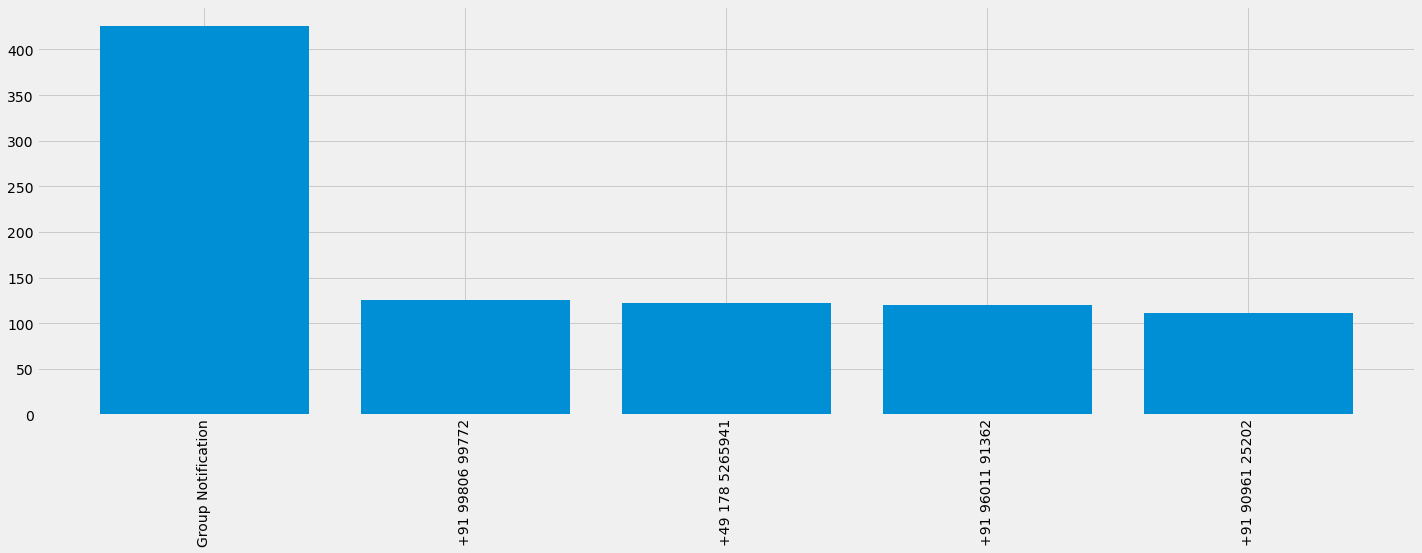

In [90]:
x = df.user.value_counts().head()
plt.bar(x.index, x.values)
plt.xticks(rotation='vertical');

In [91]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,Group Notification,14.46
1,+91 99806 99772,4.24
2,+49 178 5265941,4.14
3,+91 96011 91362,4.07
4,+91 90961 25202,3.77
...,...,...
201,+1 (972) 730-3299,0.03
202,+91 99403 45820,0.03
203,+98 936 739 0412,0.03
204,+91 99628 92900,0.03


In [92]:
## Most frequent words in a GROUP
[word for message in df.messages for word in message.split()]

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '+234',
 '808',
 '325',
 '6441',
 'created',
 'group',
 '"Data',
 'Science',
 'Enthusiasts"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+34',
 '670',
 '81',
 '40',
 '44',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+254',
 '792',
 '234815',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Anyone',
 'participating',
 'in',
 'Kaggle',
 'compititions',
 '?',
 'Not',
 'right',
 'now',
 'Me!',
 '+46',
 '73',
 '034',
 '76',
 '23',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'https://www.dataschool.io/resources/',
 '+98',
 '936',
 '739',
 '0412',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+86',
 '137',
 '2892',
 '6900',
 'joined',
 'using',
 'this',
 "g

In [93]:
pd.DataFrame(Counter(words).most_common(30))

,0,1
0,to,494
1,I,490
2,the,405
3,this,401
4,you,386
5,and,374
6,for,297
7,a,294
8,is,292
9,in,271


In [94]:
temp = df[df['user'] !='Group Notification']
temp = temp[temp['messages'] != '<Media omitted>\n']
temp

,user_message,date_time,date,time,time_24,user,messages,year,month,day,hour,minute
5,+91 80555 23200: Anyone participating in Kaggl...,"4/11/20, 5:10 PM",4/11/20,5:10 PM,17:10:00,+91 80555 23200,Anyone participating in Kaggle compititions ?\n,2020,April,11,17,10
6,+91 79871 29552: Not right now\n,"4/11/20, 5:10 PM",4/11/20,5:10 PM,17:10:00,+91 79871 29552,Not right now\n,2020,April,11,17,10
7,+91 97890 74078: Me!\n,"4/11/20, 6:08 PM",4/11/20,6:08 PM,18:08:00,+91 97890 74078,Me!\n,2020,April,11,18,8
9,+91 79871 29552: https://www.dataschool.io/res...,"4/11/20, 7:48 PM",4/11/20,7:48 PM,19:48:00,+91 79871 29552,https://www.dataschool.io/resources/\n,2020,April,11,19,48
14,+91 99033 54422: Is there any Cloud based simu...,"4/13/20, 5:04 PM",4/13/20,5:04 PM,17:04:00,+91 99033 54422,"Is there any Cloud based simulator for IoT, wh...",2020,April,13,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2939,+91 98430 54556: Work from home\n,"11/5/21, 7:58 PM",11/5/21,7:58 PM,19:58:00,+91 98430 54556,Work from home\n,2021,November,5,19,58
2940,+234 802 222 7118: thanks for sharing\n,"11/5/21, 8:03 PM",11/5/21,8:03 PM,20:03:00,+234 802 222 7118,thanks for sharing\n,2021,November,5,20,3
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00,+91 96002 37098,👍\n,2021,November,6,13,18
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00,+234 806 935 1113,"Good evening. Please,any one with Quantum comp...",2021,November,7,1,1


In [95]:
with open('stopwords.txt', 'r') as f:
    stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [96]:
#TOP 20 words
words = [word for message in temp.messages for word in message.lower().split() if word not in stop_words]
most_common = pd.DataFrame(Counter(words).most_common(20))
most_common

,0,1
0,data,227
1,science,127
2,learning,86
3,message,70
4,course,66
5,deleted,65
6,free,65
7,python,62
8,courses,56
9,group,55


In [97]:
wc_data = [word for message in temp['messages'] for word in message.lower().split() if word not in stop_words]
wc_data = ' '.join(wc_data)

In [98]:
wc_data = [word for message in temp['messages'] for word in message.lower().split() if word not in stop_words]

In [99]:
wc_data = ' '.join(wc_data)

In [100]:
wc_data 

'participating kaggle compititions me! https://www.dataschool.io/resources/ cloud based simulator iot, everthing breadboard view code generator simulator tinkercad option?? https://teachablemachine.withgoogle.com/ platform build classification postnet kind model google platform guys, dataset corona virus including gender world widw wide* find it? https://www.facebook.com/umeedforchange/ started working ngo duuring difficult time. maximum reach donations check thnak much! unfortunately contain gender. actually, datasets found focus locations number deaths find data gender appreciate help. thanks! :) dataset open source yet... john hopkins university details... analyse result approved ncdc request it? instance, country, data published egypt request data before? message deleted message deleted https://bit.ly/3eg2eqc free searched link free free screenshot entire output error? result= df[df.groupby(\'unit\').sum()] ☝ guess!! units=range (1,7) rest error ok, lemme 🤝🏿🤝🏿🤝🏿 error display conte

In [101]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc_df = wc.generate(wc_data)

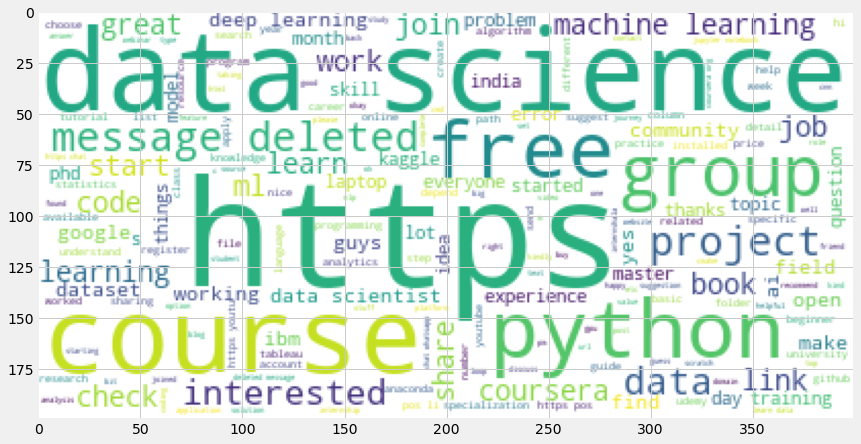

In [102]:
fig, ax = plt.subplots()
ax.imshow(wc_df);

In [103]:
!pip install emoji

In [104]:
import emoji
emojis = [c for message in df['messages'] for c in message if c in emoji.UNICODE_EMOJI['en']]
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,👍,57
1,🏻,44
2,🙏,43
3,😅,21
4,🏼,19
...,...,...
73,☮,1
74,➡,1
75,🥰,1
76,🎉,1


In [105]:
df['month_num'] = pd.to_datetime(df['date']).dt.month
df

,user_message,date_time,date,time,time_24,user,messages,year,month,day,hour,minute,month_num
0,Messages and calls are end-to-end encrypted. N...,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2020,April,11,12,13,4
1,"+234 808 325 6441 created group ""Data Science ...","12/30/19, 11:28 AM",12/30/19,11:28 AM,11:28:00,Group Notification,"+234 808 325 6441 created group ""Data Science ...",2019,December,30,11,28,12
2,You joined using this group's invite link\n,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,You joined using this group's invite link\n,2020,April,11,12,13,4
3,+34 670 81 40 44 joined using this group's inv...,"4/11/20, 1:02 PM",4/11/20,1:02 PM,13:02:00,Group Notification,+34 670 81 40 44 joined using this group's inv...,2020,April,11,13,2,4
4,+254 792 234815 joined using this group's invi...,"4/11/20, 3:27 PM",4/11/20,3:27 PM,15:27:00,Group Notification,+254 792 234815 joined using this group's invi...,2020,April,11,15,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00,+91 96002 37098,👍\n,2021,November,6,13,18,11
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00,+234 806 935 1113,"Good evening. Please,any one with Quantum comp...",2021,November,7,1,1,11
2944,+91 97890 74078 left\n,"11/7/21, 10:04 AM",11/7/21,10:04 AM,10:04:00,Group Notification,+91 97890 74078 left\n,2021,November,7,10,4,11
2945,"+91 89301 91618: Hi everyone, I looking for a ...","11/7/21, 12:57 PM",11/7/21,12:57 PM,12:57:00,+91 89301 91618,"Hi everyone, I looking for a data science job ...",2021,November,7,12,57,11


In [106]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['messages'].reset_index()
timeline

,year,month_num,month,messages
0,2019,12,December,1
1,2020,4,April,279
2,2020,5,May,354
3,2020,6,June,501
4,2020,7,July,414
5,2020,8,August,147
6,2020,9,September,246
7,2020,10,October,133
8,2020,11,November,144
9,2020,12,December,268


In [107]:
for i in range(timeline.shape[0]):
    print(timeline['month'][i]+'-'+str(timeline['year'][i]))

December-2019
April-2020
May-2020
June-2020
July-2020
August-2020
September-2020
October-2020
November-2020
December-2020
January-2021
February-2021
March-2021
April-2021
May-2021
June-2021
July-2021
August-2021
September-2021
October-2021
November-2021


In [108]:
[j for i in range(timeline.shape[0]) for j in (timeline['month'][i]+'-'+str(timeline['year'][i]))]

['D',
 'e',
 'c',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '1',
 '9',
 'A',
 'p',
 'r',
 'i',
 'l',
 '-',
 '2',
 '0',
 '2',
 '0',
 'M',
 'a',
 'y',
 '-',
 '2',
 '0',
 '2',
 '0',
 'J',
 'u',
 'n',
 'e',
 '-',
 '2',
 '0',
 '2',
 '0',
 'J',
 'u',
 'l',
 'y',
 '-',
 '2',
 '0',
 '2',
 '0',
 'A',
 'u',
 'g',
 'u',
 's',
 't',
 '-',
 '2',
 '0',
 '2',
 '0',
 'S',
 'e',
 'p',
 't',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'O',
 'c',
 't',
 'o',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'N',
 'o',
 'v',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'D',
 'e',
 'c',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'J',
 'a',
 'n',
 'u',
 'a',
 'r',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'F',
 'e',
 'b',
 'r',
 'u',
 'a',
 'r',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'M',
 'a',
 'r',
 'c',
 'h',
 '-',
 '2',
 '0',
 '2',
 '1',
 'A',
 'p',
 'r',
 'i',
 'l',
 '-',
 '2',
 '0',
 '2',
 '1',
 'M',
 'a',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'J',
 'u'

In [109]:
timeline['time'] = ['-'.join(i) for i in zip(timeline["month"],timeline["year"].map(str))]
timeline

,year,month_num,month,messages,time
0,2019,12,December,1,December-2019
1,2020,4,April,279,April-2020
2,2020,5,May,354,May-2020
3,2020,6,June,501,June-2020
4,2020,7,July,414,July-2020
5,2020,8,August,147,August-2020
6,2020,9,September,246,September-2020
7,2020,10,October,133,October-2020
8,2020,11,November,144,November-2020
9,2020,12,December,268,December-2020


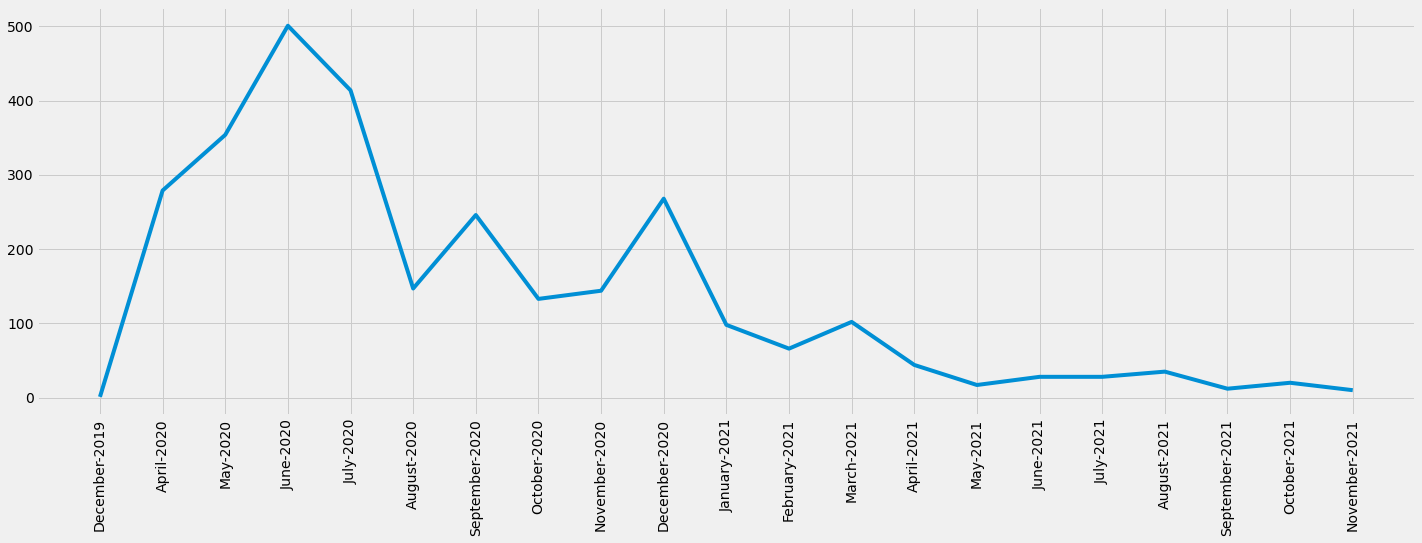

In [110]:
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation='vertical');

In [116]:
'''
daily_timeline = df.groupby(by='date').count()['messages'].reset_index()
plt.plot(daily_timeline['date'], daily_timeline['messages'])
plt.xticks(rotation='vertical');
'''

"\ndaily_timeline = df.groupby(by='date').count()['messages'].reset_index()\nplt.plot(daily_timeline['date'], daily_timeline['messages'])\nplt.xticks(rotation='vertical');\n"

In [112]:
df['day_name'] = pd.to_datetime(df['date']).dt.day_name()
df

,user_message,date_time,date,time,time_24,user,messages,year,month,day,hour,minute,month_num,day_name
0,Messages and calls are end-to-end encrypted. N...,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2020,April,11,12,13,4,Saturday
1,"+234 808 325 6441 created group ""Data Science ...","12/30/19, 11:28 AM",12/30/19,11:28 AM,11:28:00,Group Notification,"+234 808 325 6441 created group ""Data Science ...",2019,December,30,11,28,12,Monday
2,You joined using this group's invite link\n,"4/11/20, 12:13 PM",4/11/20,12:13 PM,12:13:00,Group Notification,You joined using this group's invite link\n,2020,April,11,12,13,4,Saturday
3,+34 670 81 40 44 joined using this group's inv...,"4/11/20, 1:02 PM",4/11/20,1:02 PM,13:02:00,Group Notification,+34 670 81 40 44 joined using this group's inv...,2020,April,11,13,2,4,Saturday
4,+254 792 234815 joined using this group's invi...,"4/11/20, 3:27 PM",4/11/20,3:27 PM,15:27:00,Group Notification,+254 792 234815 joined using this group's invi...,2020,April,11,15,27,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,+91 96002 37098: 👍\n,"11/6/21, 1:18 PM",11/6/21,1:18 PM,13:18:00,+91 96002 37098,👍\n,2021,November,6,13,18,11,Saturday
2943,"+234 806 935 1113: Good evening. Please,any on...","11/7/21, 1:01 AM",11/7/21,1:01 AM,01:01:00,+234 806 935 1113,"Good evening. Please,any one with Quantum comp...",2021,November,7,1,1,11,Sunday
2944,+91 97890 74078 left\n,"11/7/21, 10:04 AM",11/7/21,10:04 AM,10:04:00,Group Notification,+91 97890 74078 left\n,2021,November,7,10,4,11,Sunday
2945,"+91 89301 91618: Hi everyone, I looking for a ...","11/7/21, 12:57 PM",11/7/21,12:57 PM,12:57:00,+91 89301 91618,"Hi everyone, I looking for a data science job ...",2021,November,7,12,57,11,Sunday


In [113]:
df.day_name.value_counts() 

Tuesday      551
Saturday     542
Friday       443
Sunday       368
Thursday     361
Wednesday    358
Monday       324
Name: day_name, dtype: int64

In [114]:
#Preparing Data for Heatmap
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
df['period'] = period 

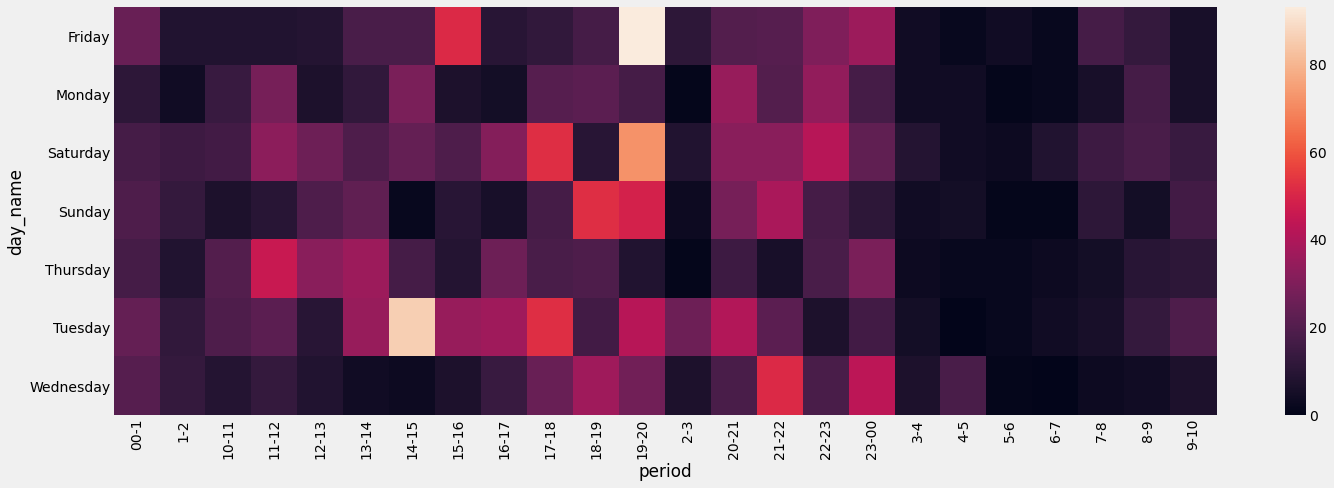

In [115]:
sns.heatmap(df.sort_values(by = 'hour', ascending=True).pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical');